# install and import dependencies

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.10.0+cu113
True


### Test

In [6]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

Using cache found in C:\Users\huhon/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-11-12 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 8192MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
# Images
img = 'cat.1.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 280x300 (no detections)
Speed: 8.0ms pre-process, 79.8ms inference, 2.0ms NMS per image at shape (1, 3, 608, 640)


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# load model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\huhon/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-11-12 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 8192MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

In [7]:
img = '01.jpeg'

In [8]:
results = model(img)
results.print()

image 1/1: 360x640 4 persons, 19 cars, 1 traffic light
Speed: 25.9ms pre-process, 32.9ms inference, 5.0ms NMS per image at shape (1, 3, 384, 640)


In [9]:
results.show()

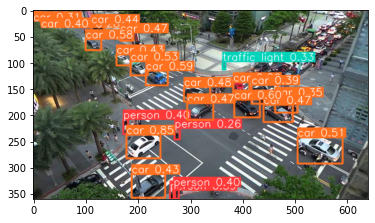

In [47]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))#Remove the 1 dimension from shape and render
plt.show()

In [48]:
results.xyxy

[tensor([[1.78000e+02, 2.37875e+02, 2.43250e+02, 2.82000e+02, 8.48633e-01, 2.00000e+00],
         [3.84000e+02, 1.70500e+02, 4.33000e+02, 2.04000e+02, 5.98633e-01, 2.00000e+00],
         [2.15375e+02, 1.15625e+02, 2.57500e+02, 1.43625e+02, 5.92773e-01, 2.00000e+00],
         [1.00375e+02, 5.53750e+01, 1.30000e+02, 7.60000e+01, 5.75684e-01, 2.00000e+00],
         [1.86125e+02, 9.73125e+01, 2.19125e+02, 1.24750e+02, 5.32715e-01, 2.00000e+00],
         [5.05500e+02, 2.42500e+02, 5.91500e+02, 2.92000e+02, 5.10254e-01, 2.00000e+00],
         [2.88000e+02, 1.46375e+02, 3.38500e+02, 1.74125e+02, 4.82422e-01, 2.00000e+00],
         [1.66250e+02, 4.37500e+01, 1.91500e+02, 5.85000e+01, 4.74609e-01, 2.00000e+00],
         [2.94250e+02, 1.77875e+02, 3.44250e+02, 2.09125e+02, 4.74121e-01, 2.00000e+00],
         [4.40750e+02, 1.80250e+02, 4.96250e+02, 2.13000e+02, 4.68750e-01, 2.00000e+00],
         [1.11750e+02, 2.61250e+01, 1.35250e+02, 3.97500e+01, 4.42383e-01, 2.00000e+00],
         [1.88500e+02

        - the output from running results.xyxy is as follow:
        xmin
        ymin
        xmax
        ymax
        confidence
        class

In [54]:
np.array(results.render()).shape

(1, 360, 640, 3)

# real time detections

In [55]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # make detections
    results = model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # make detections
    results = model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# train from scratch

In [5]:
import uuid #unique identifier
import os
import time

In [9]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [12]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [11]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.74addc4c-4369-11ec-818e-9cfce819982a.jpg


In [10]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data\images\awake.f77561b7-4368-11ec-afd0-9cfce819982a.jpg
data\images\awake.f77561b8-4368-11ec-a869-9cfce819982a.jpg
data\images\awake.f77561b9-4368-11ec-bb98-9cfce819982a.jpg
data\images\awake.f77561ba-4368-11ec-9a72-9cfce819982a.jpg
data\images\awake.f77561bb-4368-11ec-8539-9cfce819982a.jpg
data\images\awake.f77561bc-4368-11ec-ba02-9cfce819982a.jpg
data\images\awake.f77561bd-4368-11ec-a2af-9cfce819982a.jpg
data\images\awake.f77561be-4368-11ec-9080-9cfce819982a.jpg
data\images\awake.f77561bf-4368-11ec-a258-9cfce819982a.jpg
data\images\awake.f77561c0-4368-11ec-94c2-9cfce819982a.jpg
data\images\awake.f77561c1-4368-11ec-b134-9cfce819982a.jpg
data\images\awake.f77561c2-4368-11ec-a8e5-9cfce819982a.jpg
data\images\awake.f77561c3-4368-11ec-b769-9cfce819982a.jpg
data\images\awake.f77561c4-4368-11ec-83bd-9cfce819982a.jpg
data\images\awake.f77561c5-4368-11ec-867f-9cfce819982a.jpg
data\images\awake.f77561c6-4368-11ec-b37c-9cfce819982a.jpg
data\images\awake.f77561c7-4368-11ec-8ad1-9cfce819982a.j

In [4]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Looking in indexes: http://pypi.douban.com/simple/
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
spyder 4.2.5 requires pyqt5<5.13, but you have pyqt5 5.15.6 which is incompatible.


- yolo format:
    [class number,
    x centre coordinate,
    y centre coordinate,
    width,
    height]

In [24]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'

autoanchor: Analyzing anchors... anchors/target = 4.53, Best Possible Recall (BPR) = 1.0000
Optimizer stripped from runs\train\exp15\weights\last.pt, 14.4MB
Optimizer stripped from runs\train\exp15\weights\best.pt, 14.4MB


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-11-12 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mos


     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]                                           
    20/499     1.07G    0.0672   0.02515   0.05037        37       320:   0%|   
    20/499     1.07G    0.0672   0.02515   0.05037        37       320:  33%|###
    20/499     1.07G   0.06607   0.02827   0.05168        48       320:  33%|###
    20/499     1.07G   0.06607   0.02827   0.05168        48       320:  67%|###
    20/499     1.07G   0.06631   0.02664   0.05178        18       320:  67%|###
    20/499     1.07G   0.06631   0.02664   0.05178        18       320: 100%|###
    20/499     1.07G   0.06631   0.02664   0.05178        18       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40    

  0%|          | 0/3 [00:00<?, ?it/s]                                           
    59/499     1.07G   0.05756   0.01721   0.02185        42       320:   0%|   
    59/499     1.07G   0.05388   0.01584   0.01949        36       320:   0%|   
    59/499     1.07G   0.05388   0.01584   0.01949        36       320:  67%|###
    59/499     1.07G   0.05387   0.01566   0.01926        21       320:  67%|###
    59/499     1.07G   0.05387   0.01566   0.01926        21       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.615      0.908      0.838       0.46

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]                                           
    60/499     1.07G   0.0568


     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]                                           
   194/499     1.07G   0.04185   0.01084   0.00627        40       320:   0%|   
   194/499     1.07G   0.04185   0.01084   0.00627        40       320:  33%|###
   194/499     1.07G    0.0414   0.01122  0.006336        42       320:  33%|###
   194/499     1.07G   0.03931   0.01035  0.005607        16       320:  33%|###
   194/499     1.07G   0.03931   0.01035  0.005607        16       320: 100%|###
   194/499     1.07G   0.03931   0.01035  0.005607        16       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.764      0.975      0.983      0.449

     Epoch   gpu_mem       b

   228/499     1.07G   0.03694   0.01089   0.00898        24       320:  67%|###
   228/499     1.07G   0.03694   0.01089   0.00898        24       320: 100%|###
   228/499     1.07G   0.03694   0.01089   0.00898        24       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40          1          1      0.995      0.704

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]                                           
   229/499     1.07G   0.03317    0.0114  0.005072        43       320:   0%|   
   229/499     1.07G   0.03317    0.0114  0.005072        43       320:  33%|###
   229/499     1.07G   0.03324    0.0115  0.006138        44       320:  33%|###
   229/499     1.07G   0.0332

                 all         40         40          1          1      0.995      0.886

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]                                           
   430/499     1.07G    0.0203  0.007873  0.002132        41       320:   0%|   
   430/499     1.07G    0.0203  0.007873  0.002132        41       320:  33%|###
   430/499     1.07G   0.02034  0.008691  0.002138        45       320:  33%|###
   430/499     1.07G   0.02034  0.008691  0.002138        45       320:  67%|###
   430/499     1.07G   0.01942  0.008039  0.002016        17       320:  67%|###
   430/499     1.07G   0.01942  0.008039  0.002016        17       320: 100%|###
   430/499     1.07G   0.01942  0.008039  0.002016        17       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Imag

  0%|          | 0/3 [00:00<?, ?it/s]                                           
   464/499     1.07G   0.01725  0.006889  0.002286        35       320:   0%|   
   464/499     1.07G   0.01725  0.006889  0.002286        35       320:  33%|###
   464/499     1.07G   0.01695  0.007686  0.002043        42       320:  33%|###
   464/499     1.07G   0.01695  0.007686  0.002043        42       320:  67%|###
   464/499     1.07G   0.01634  0.007775  0.001961        24       320:  67%|###
   464/499     1.07G   0.01634  0.007775  0.001961        24       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.999          1      0.995      0.895

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?

In [25]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\huhon/.cache\torch\hub\master.zip
YOLOv5  2021-11-12 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 8192MiB)

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [26]:
img = os.path.join('data', 'images', 'awake.d5fe7f50-4369-11ec-8703-9cfce819982a.jpg')

In [27]:
results = model(img)

In [28]:
results.print()

image 1/1: 480x640 1 awake
Speed: 7.0ms pre-process, 37.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


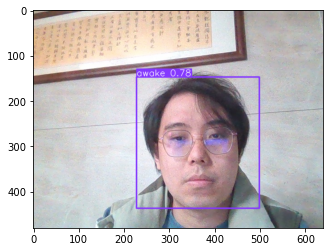

In [29]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [32]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()